In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from pickle import load, dump

from IPython.display import display, HTML
display(HTML("<style>.container { width:100%!important;}</style>"))

sns.set(style = "white",font_scale = 1.5,rc={'figure.figsize':(10.7,7.27)})

import warnings
warnings.filterwarnings('ignore')


from pyspark.ml.classification import LogisticRegression as LogisticR
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler

# Data Import and Info

In [3]:
df_segmentation = pd.read_csv(r'C:\Users\m7812\Dropbox\Udemy courses\Customer Analytics in Python 2022\segmentation data.csv', index_col = 0)

In [4]:
print('---------------------------5 data rows viewed---------------------------')
display(df_segmentation.head())
print('---------------------------description---------------------------')
display(df_segmentation.describe())
print('---------------------------info------------------a---------')
display(df_segmentation.info())

---------------------------5 data rows viewed---------------------------


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


---------------------------description---------------------------


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


---------------------------info------------------a---------
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


None

# analyzing

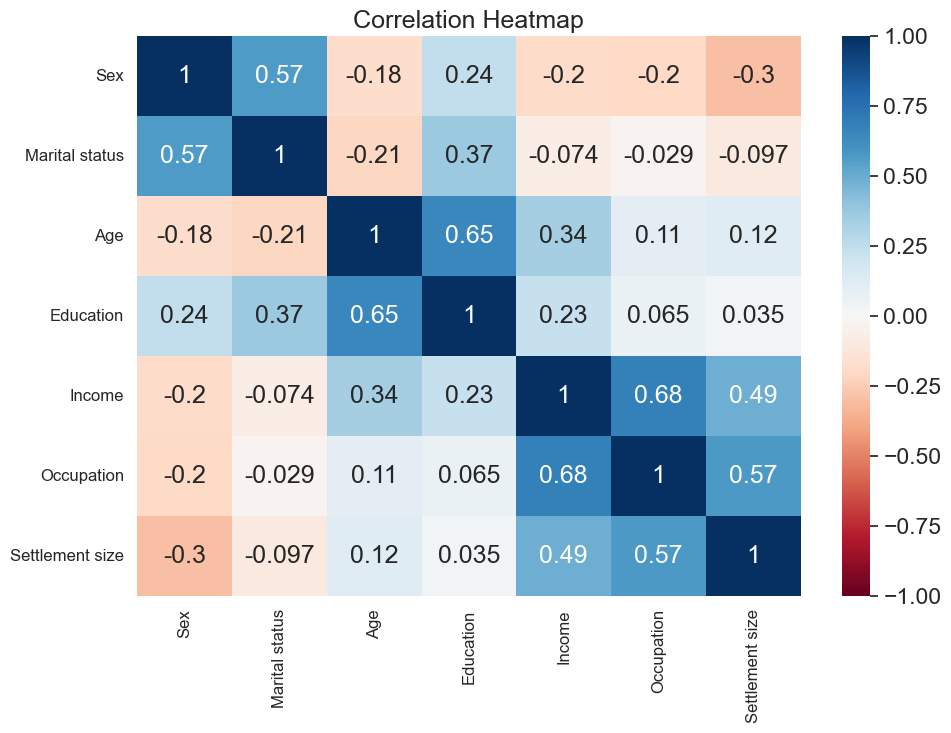

In [5]:
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing 

In [6]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [7]:
df_segmentation.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [8]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

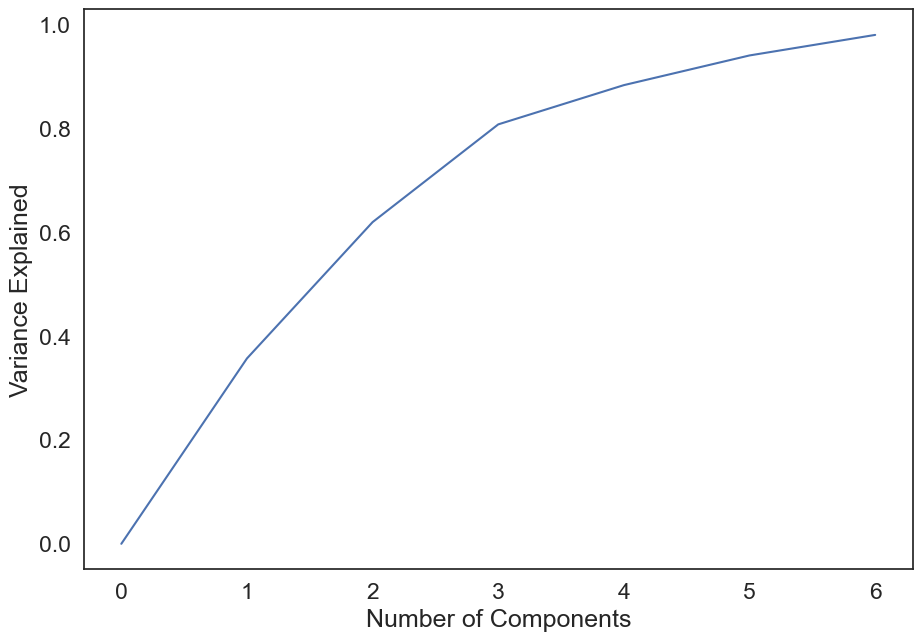

------------------可解釋方差-------------------
[0.35696328 0.26250923 0.18821114]
sum of variance: 0.8076836525675659

-----------------每個components對欄位的權重配置--------------------


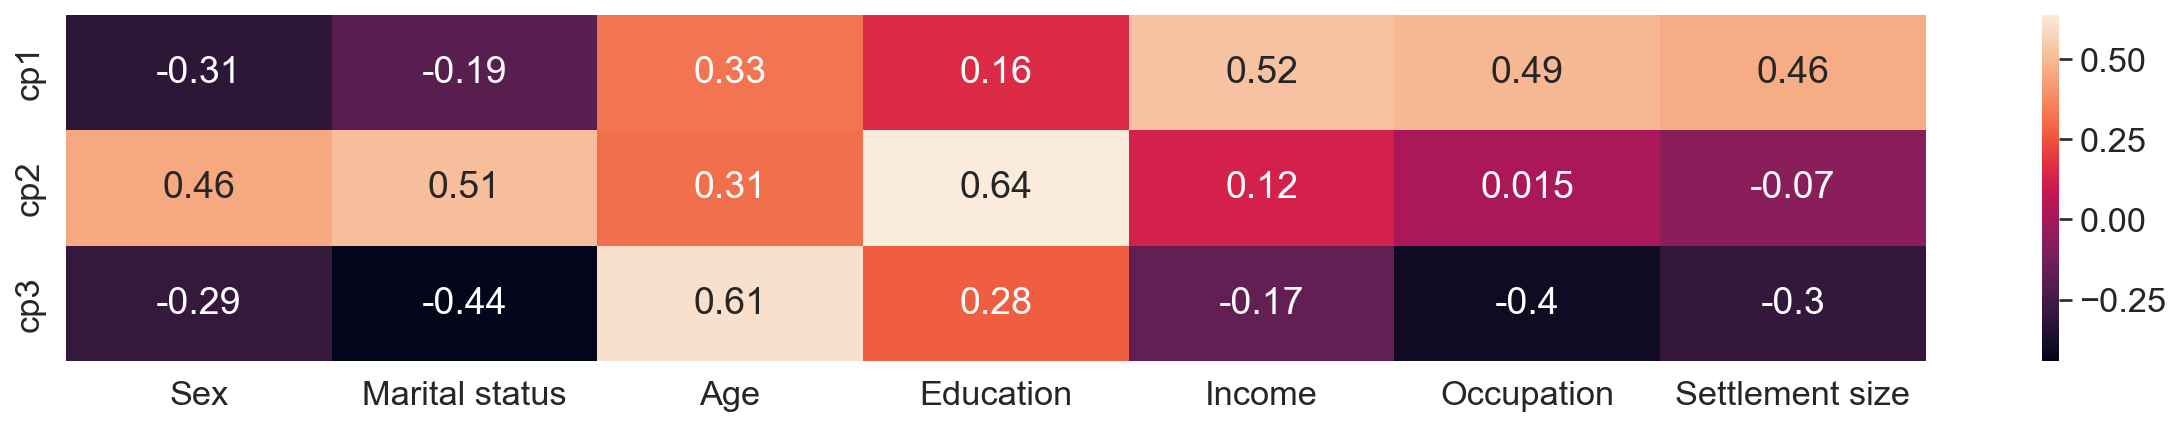

In [9]:
# plt.figure(figsize = (12, 9))
'''列出解釋變數比例'''
wuss = []
for n in range(len(df_segmentation.columns)):
    pca = PCA(n_components = n)
    pca_result = pca.fit(segmentation_std)
    wuss.append(sum(pca_result.explained_variance_ratio_))
plt.plot(range(len(df_segmentation.columns)),wuss)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");
plt.show() #依據elbow法則以及每次主成分抓約略80%，選定3個components
pca = PCA(n_components=3)
pca_result = pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
print('------------------可解釋方差-------------------')
print(pca_result.explained_variance_ratio_)
print('sum of variance:',sum(pca_result.explained_variance_ratio_))
print('\n-----------------每個components對欄位的權重配置--------------------')
df_comp = pd.DataFrame(pca_result.components_,index=['cp1','cp2','cp3'],columns=df_segmentation.columns)
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True);

In [10]:
'''檢視3d用'''
# %matplotlib notebook
# plt.figure(figsize=(8,8))
# ax = plt.axes(projection='3d')
# plt.scatter(scores_pca[:,0], scores_pca[:,1], scores_pca[:,2], c=df_segmentation.Age)
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')

'檢視3d用'

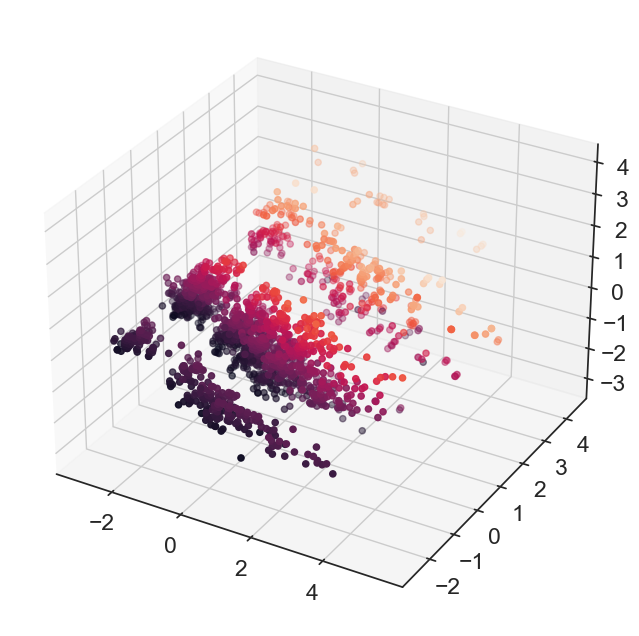

In [11]:
%matplotlib inline
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(scores_pca[:,0],scores_pca[:,1],scores_pca[:,2],c = df_segmentation.Age)
plt.ioff()

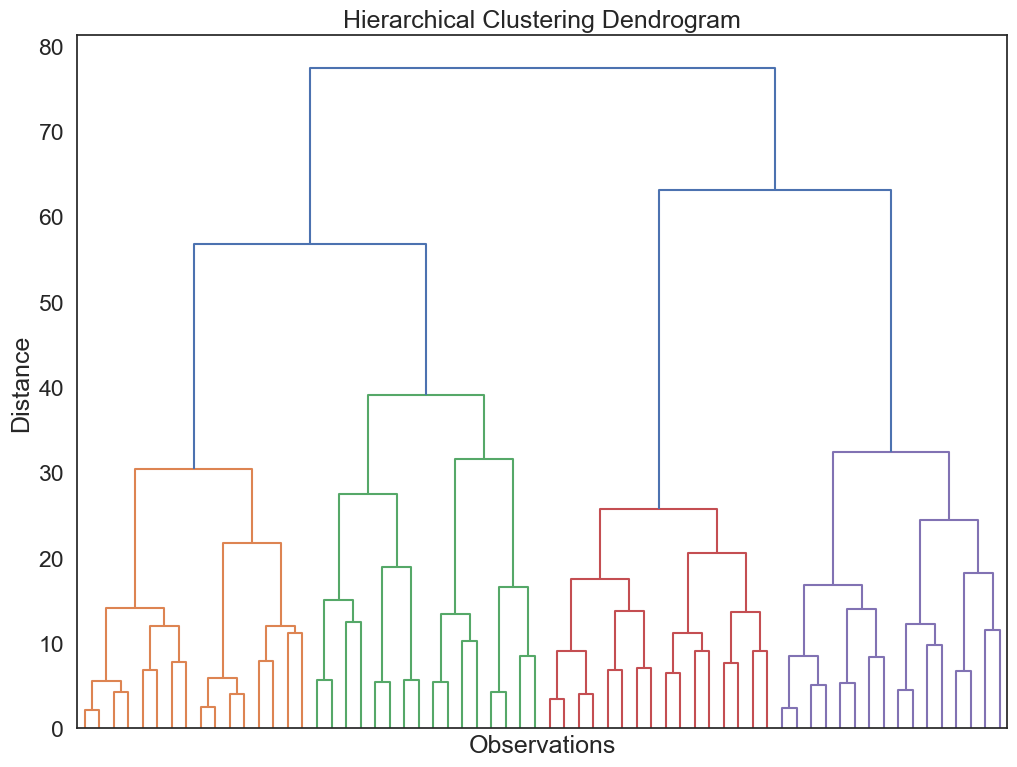

In [12]:
'''hierarchy'''
hier_clust = linkage(segmentation_std,method = 'ward')
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
          truncate_mode='level',
          p=5,
          show_leaf_counts= False,
          no_labels= True)
plt.show()

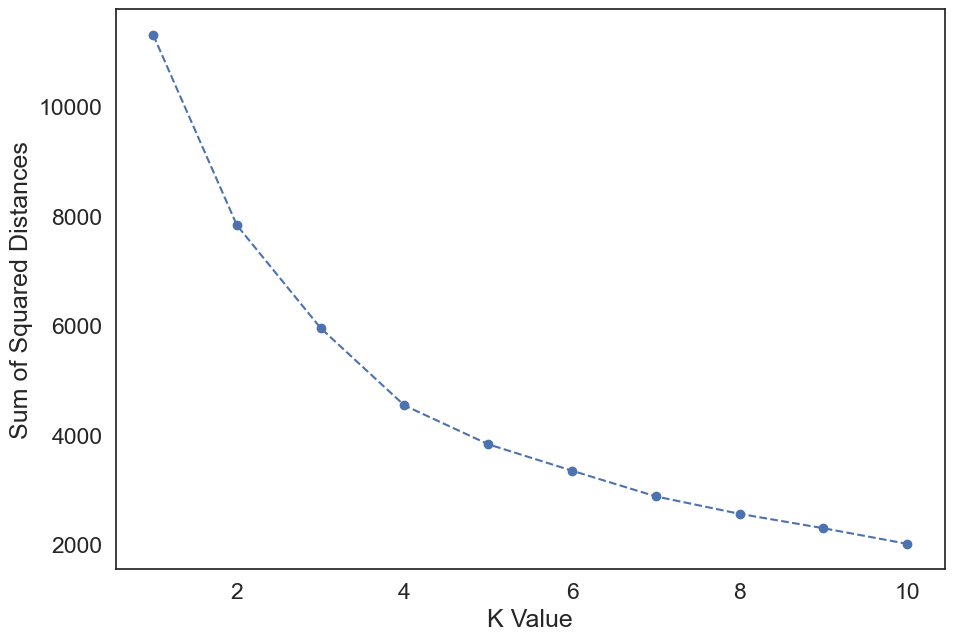

In [13]:
'''利用elbow method找到最佳kmean的n_cluster'''
ssd = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
    kmeans.fit(scores_pca)
    ssd.append(kmeans.inertia_) #inertia_ =>Sum of squared distances of samples
plt.plot(range(1,11),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.show()

In [14]:
'''利用elbow method判斷最佳分群數約略在4~6之間。決定先區分5群，並進行分類'''
kmeans_pca = KMeans(n_clusters =5, init = 'k-means++', random_state = 42)
cluster_labels = kmeans_pca.fit_predict(scores_pca)
cluster_labels #kmeans.labels_
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans_pca.labels_
# df_segm_kmeans = pd.concat([df_segm_kmeans.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.rename({0:'high_level',
                         1:'fewer_opportunities',
                         2:'well_off',
                         3:'early_goal_oriented_stage',
                         4:'standard'},inplace = True)
display(df_segm_analysis)
'''計算這五群分類比例'''
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
'''重新命名利用k-mean的五群'''
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'high_level',
                                                                 1:'fewer_opportunities',
                                                                 2:'well_off',
                                                                 3:'early_goal_oriented_stage',
                                                                 4:'standard'})
df_segm_kmeans_pca = pd.concat([df_segm_kmeans.reset_index(),pd.DataFrame(scores_pca)],axis = 1) 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
high_level,0.478088,0.677291,55.764940,2.135458,160996.087649,1.175299,1.147410
fewer_opportunities,0.096386,0.000000,34.506024,0.560241,97094.189759,0.346386,0.117470
well_off,0.879487,0.730769,33.787179,1.179487,88644.882051,0.053846,0.000000
early_goal_oriented_stage,0.779439,0.938318,27.915888,1.003738,119174.517757,1.039252,0.768224
standard,0.004065,0.073171,37.099593,0.725610,144174.142276,1.288618,1.504065


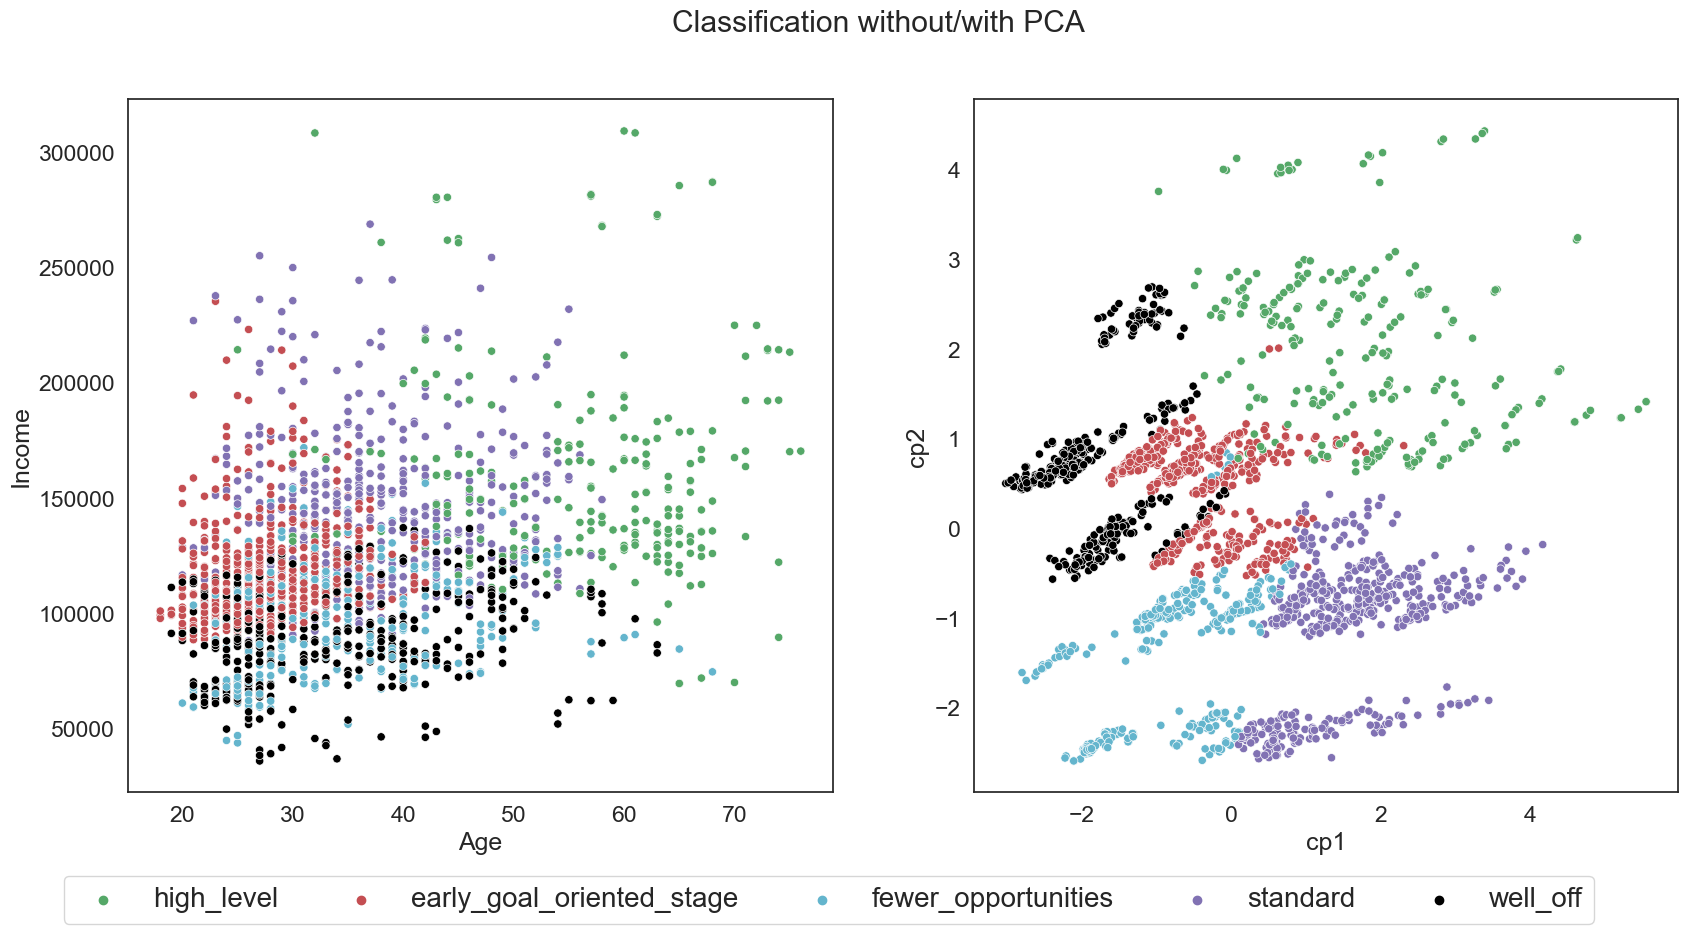

In [15]:
'''左圖未使用pca降維方法進行分類可以看到全部都參雜在一起，而右圖使用PCA進行分類可以看出分類效果提升，雖然還是有些微參雜在一起'''
fig, ax = plt.subplots(1,2,figsize=(20,9))
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
sns.scatterplot(
    x = x_axis, 
    y = y_axis,
    hue = df_segm_kmeans['Labels'],
    palette=['g', 'r', 'c', 'm', 'black'],
    ax=ax[0],
    legend = False
)

sns.scatterplot(
    x = scores_pca[:,0],
    y = scores_pca[:,1],
    hue = df_segm_kmeans['Labels'],
    palette=['g', 'r', 'c', 'm', 'black'],
    ax=ax[1]
)
plt.xlabel('cp1')
plt.ylabel('cp2')
plt.legend(bbox_to_anchor = (0.9,-0.1),ncol=5,fontsize=20)

plt.suptitle('Classification without/with PCA')
plt.show()

In [16]:
# '''檢視3d用'''
# print('---------------------------------3D互動顯示---------------------------------')
# %matplotlib notebook
# plt.figure(figsize=(8,8),dpi=100)
# ax = plt.axes(projection='3d')
# ax.scatter3D(scores_pca[:,0],scores_pca[:,1],scores_pca[:,2],c=df_segm_kmeans['Segment K-means'])
# ax.set_xlabel('pca1')
# ax.set_ylabel('pca2')
# ax.set_zlabel('pca3')

In [17]:
# silhouette_score_list = []
# for i in range(39,55):
#     kmeans_pca = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
#     cluster_labels = kmeans_pca.fit_predict(scores_pca)
#     cluster_labels #kmeans.labels_
#     silhouette_score_list.append(metrics.silhouette_score(df_segmentation,cluster_labels))
# # https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
# a = scaled_df.iloc[0]
# print(sum(a.values))
# b = scaled_df.iloc[len(df_segmentation)-1]
# print(sum(b.values))
# # np.linalg.norm(a-b) =>for calcuating euclidean distance
# dist = np.linalg.norm(a-b) 
# dist

In [18]:
# %matplotlib inline
# plt.figure(figsize=(8,8),dpi=100)
# ax = plt.axes(projection='3d')
# ax.scatter3D(scores_pca[:,0],scores_pca[:,1],scores_pca[:,2],c=df_segm_kmeans['Segment K-means'])

In [19]:
# '''save_data&module'''
# df_segm_kmeans_pca.to_excel('df_segm_kmeans_pca.xlsx') 
# dump(scaler, open('scaler.pickle', 'wb'))
# dump(pca, open('pca.pickle', 'wb'))
# dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

In [20]:
'''已針對消費者的各特徵進行分類後，以下會針對新的資料給予分類'''

'已針對消費者的各特徵進行分類後，以下會針對新的資料給予分類'

# Purchase Data(New)

In [21]:
df_purchased = pd.read_csv(r'C:\Users\m7812\Dropbox\Udemy courses\Customer Analytics in Python 2022\Section08 - Purchase Data\purchase data.csv')

In [22]:
feature = df_purchased[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
purchase_segm_std = scaler.transform(feature)
purchase_segm_pca = pca.transform(purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(purchase_segm_pca)
purchase_segm_kmeans_pca

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
df_purchase_segm_kmeans_pca = df_purchased.copy()
df_purchase_segm_kmeans_pca['Segments'] = purchase_segm_kmeans_pca
df_purchase_segm_kmeans_pca

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,1


In [24]:
'''了解各區塊的分佈比例'''
df_group_protion = df_purchase_segm_kmeans_pca['Segments'].value_counts()/len(df_purchase_segm_kmeans_pca)
labels = df_group_protion.rename(({0:'high_level',
                                 1:'fewer_opportunities',
                                 2:'well_off',
                                 3:'early_goal_oriented_stage',
                                 4:'standard'})).index

plt.figure(figsize = (16,9), dpi=80)
plt.pie(x=df_group_protion,
       labels = labels,
       autopct='%1.2f%%',
       colors = ['g', 'r', 'c', 'm', 'orange'],
       textprops={'fontsize':20});
plt.title('Segment Proportions');

In [31]:
'''計算每個族群購買機率分布'''
df_incidence = pd.DataFrame(df_purchase_segm_kmeans_pca.groupby('ID').sum()['Incidence']/
                            df_purchase_segm_kmeans_pca.groupby('ID').count()['Segments']*100,columns=['Incidence rate'])
group_segments = df_purchase_segm_kmeans_pca.groupby('ID').first()['Segments'].values
df_incidence['group_segments'] = group_segments

df_incidence['group_segments'] = df_incidence['group_segments'].map({0:'high_level',
                                                                     1:'fewer_opportunities',
                                                                     2:'well_off',
                                                                     3:'early_goal_oriented_stage',
                                                                     4:'standard'})
sns.set_style('ticks')
plt.figure(figsize=(20,7),dpi=150)
sns.histplot(data = df_incidence,
            x='Incidence rate',
#             bins=35,
            binwidth=6,
            kde=True,
            hue='group_segments',
            multiple='dodge',
            palette = ['g','r','b','y','black'])
plt.xlabel('Incidence rate/%')

Text(0.5, 0, 'Incidence rate/%')

In [ ]:
df_incidence

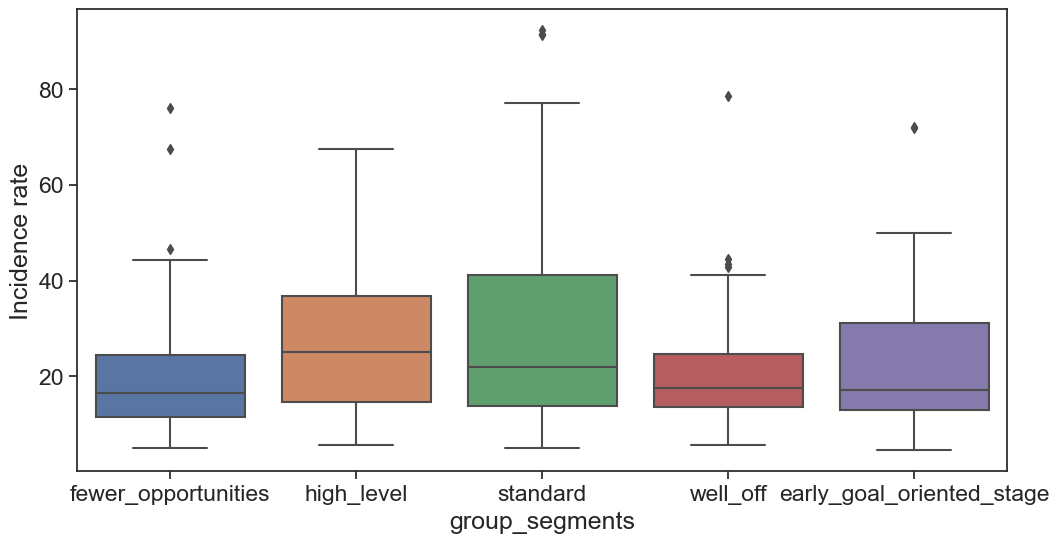

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_incidence,x='group_segments',y='Incidence rate')
plt.show()

In [43]:
'''五個族群的購買機率平均值&中位數'''
display(df_incidence.groupby('group_segments').mean())
df_incidence.groupby('group_segments').median()

,Incidence rate
group_segments,
early_goal_oriented_stage,22.384400
fewer_opportunities,19.833510
high_level,28.751521
standard,29.192032
well_off,20.552459


,Incidence rate
group_segments,
early_goal_oriented_stage,17.208426
fewer_opportunities,16.528926
high_level,25.126263
standard,21.985816
well_off,17.647059


In [27]:
'''每個族群所對應的品牌偏好'''
d_pruchase_incidence = df_purchase_segm_kmeans_pca[df_purchase_segm_kmeans_pca.Incidence == 1]
brand_dummies = pd.get_dummies(d_pruchase_incidence['Brand'],prefix='Brand_')
brand_dummies['Segments'], brand_dummies['ID'] = d_pruchase_incidence['Segments'], d_pruchase_incidence['ID']
temp = brand_dummies.groupby(['ID']).mean()
mean_brand_choice = temp.groupby(['Segments']).mean()

df_incidence['group_segments'] = df_incidence['group_segments'].map({0:'high_level',
                                                                     1:'fewer_opportunities',
                                                                     2:'well_off',
                                                                     3:'early_goal_oriented_stage',
                                                                     4:'standard'})

plt.figure(figsize=(15,7),)
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot = True)
plt.yticks([0,1,2,3,4],['high_level','fewer_opportunities','well_off','early_goal_oriented_stage','standard'], rotation = 45, fontsize=15);

In [28]:
'''Purchase Data族群購買分布'''
df_purchase_segm_kmeans_pca[df_purchase_segm_kmeans_pca['Incidence']==1].groupby('Brand').count()[['ID']].rename(columns={'ID':'Counts'})

,Counts
Brand,
1,1350
2,4542
3,841
4,2927
5,4978


# Purchase Probability by Segments

coef [[-2.34795316]]


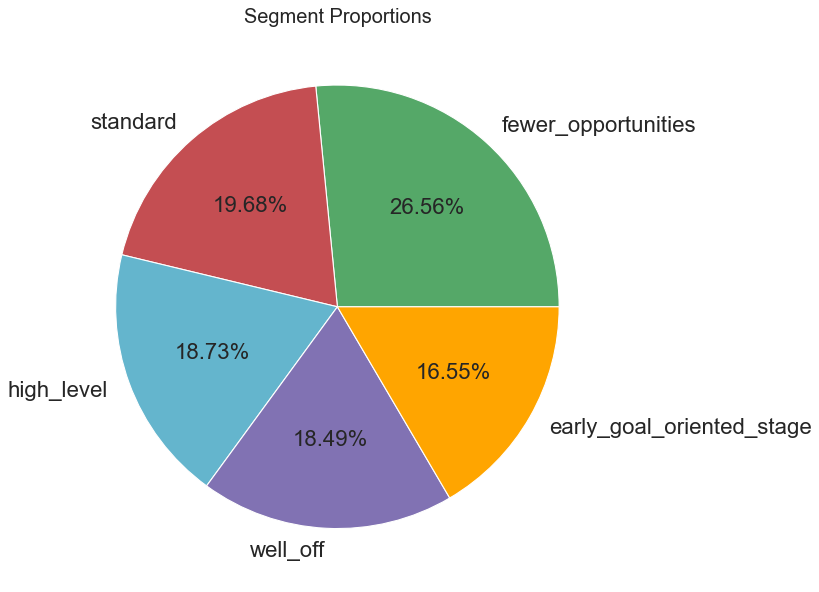

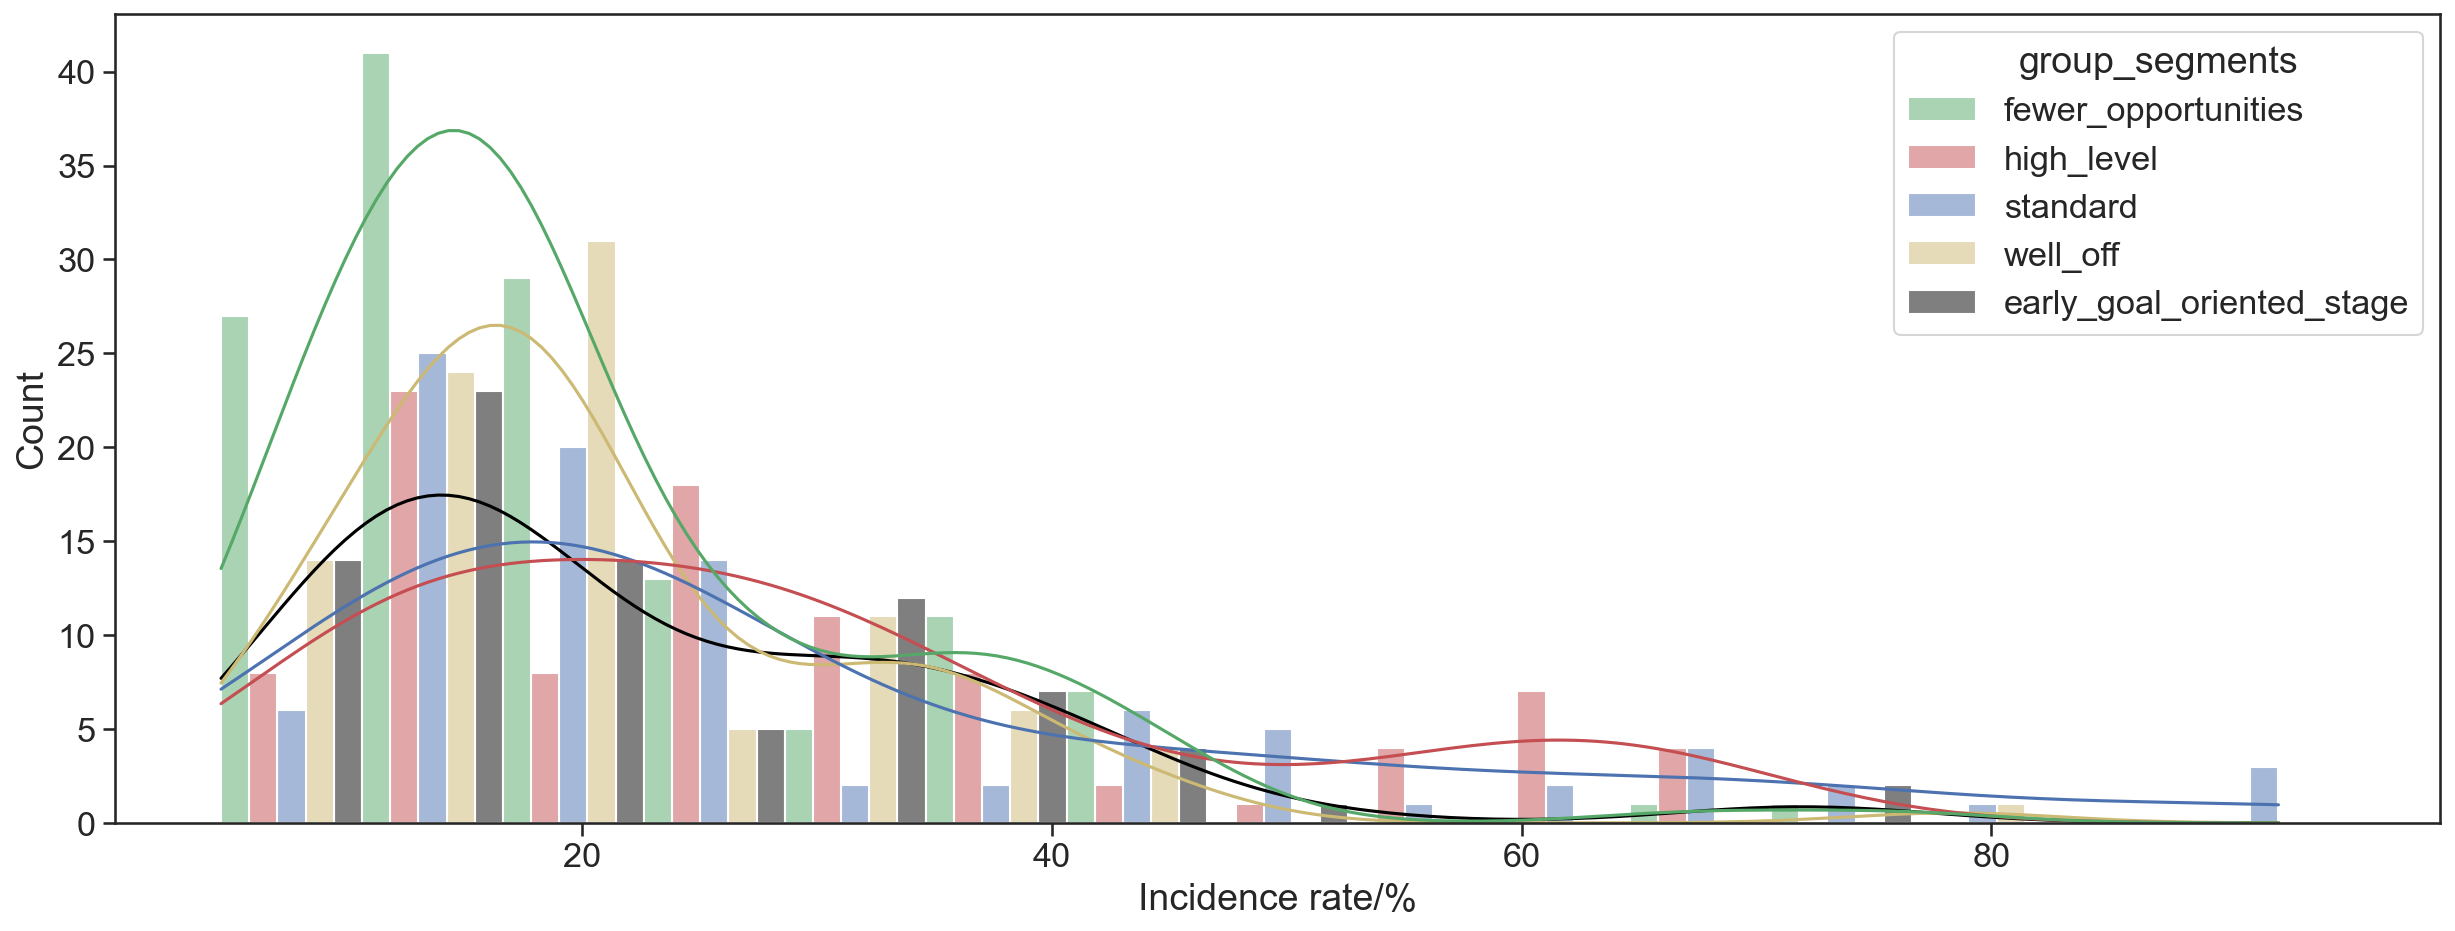

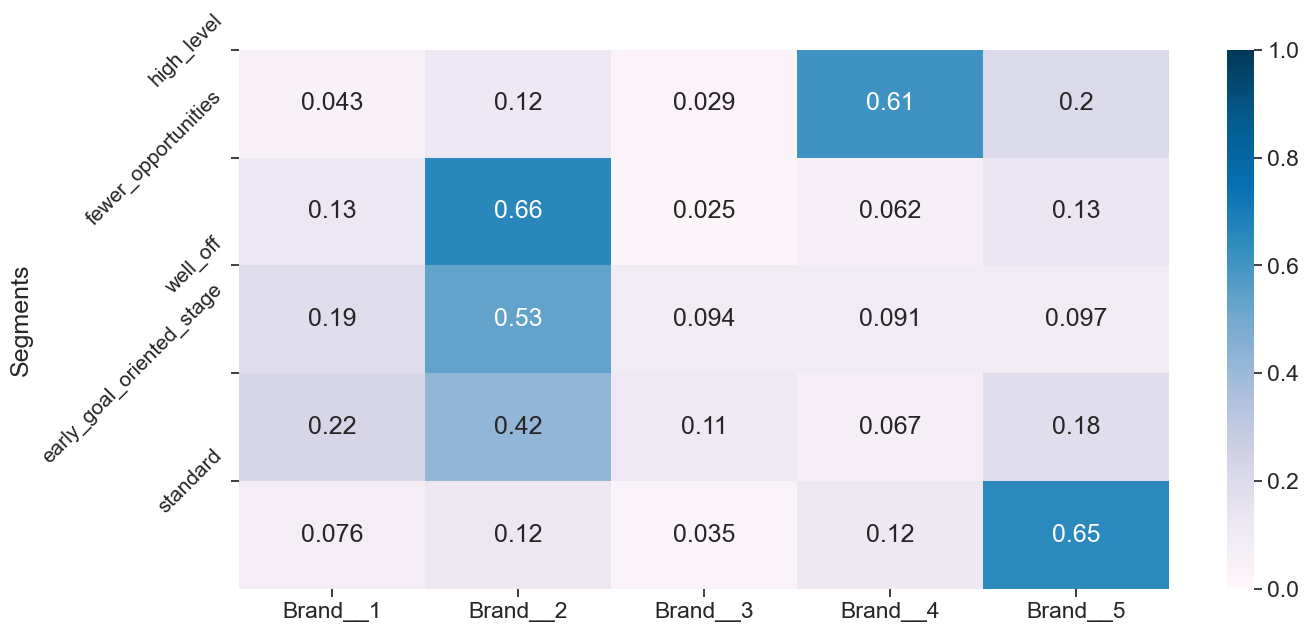

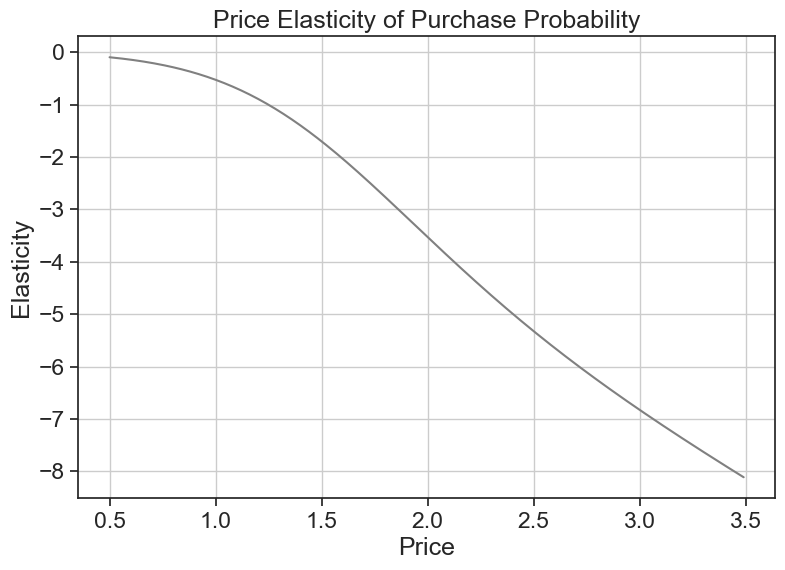

In [29]:
df_pa = df_purchase_segm_kmeans_pca
# In order to predict we need input and output variables. 
# Our Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']
# Our dependant variable is based on the average price of chocolate candy bars. 
# Therefore, X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5
# We create a Logistic Regression model using sk learn. Then we fit the model with our X or price and our Y or incidence.
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
print('coef',model_purchase.coef_)
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
df_price_range = pd.DataFrame(price_range)
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics part of the course.
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.grid(True)
plt.show()

In [44]:
for i in range(5):
    # We filter the data to contain only customers all segments
    df_pa_segment_1 = df_pa[df_pa['Segments'] == i]
    # Again we want to predict the purchase probability, so our Y variable is the incidence column.
    # Only here we select only the customers from the first segment.
    Y = df_pa_segment_1['Incidence']
    X = pd.DataFrame()
    # We calculate the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.
    X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                       df_pa_segment_1['Price_2'] + 
                       df_pa_segment_1['Price_3'] + 
                       df_pa_segment_1['Price_4'] + 
                       df_pa_segment_1['Price_5']) / 5
    # Fit logistic regression model
    model_incidence_segment_1 = LogisticRegression(solver = 'sag')
    model_incidence_segment_1.fit(X, Y)
    # We observe that the price coefficient for the career focused is -1.7, whereas for the average customer it was -2.35.
    # This is an indicator, that this segment is less price sensitive compared to the average customer.
    model_incidence_segment_1.coef_
    # Calculate Price Elasticity of the career-focused segment.
    Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
    purchase_pr_segment_1 = Y_segment_1[:][:, 1]
    pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)
    df_price_elasticities[f'PE_Segment_{i}'] = pe_segment_1


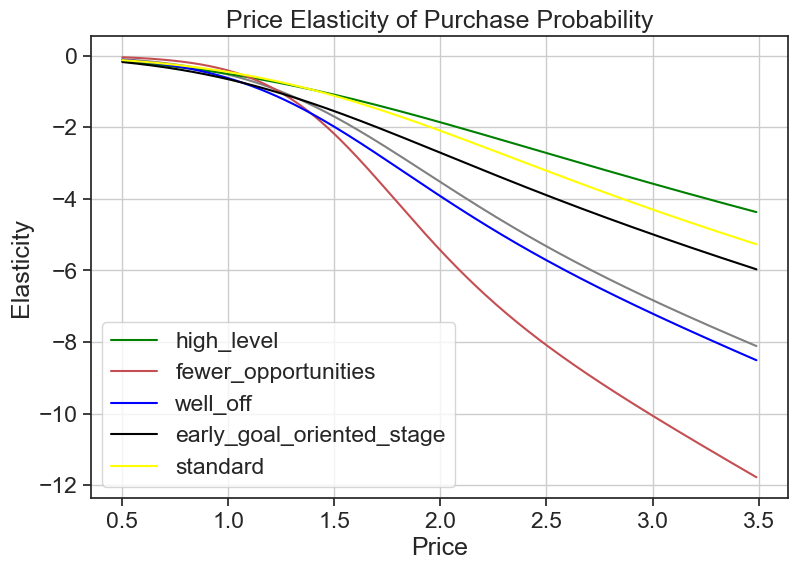

In [45]:
# We plot the elasticities of the average customer and the career-focused segment side by side. 
# The career-focused segment is displayed in green. The same color we used during the descriptive analysis.

# plt.figure(figsize = (9, 6))
fig, ax = plt.subplots(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
color_pair = {0:'green',1:'r',2:'blue',3:'black',4:'yellow'}
legeng = {0:'high_level',
     1:'fewer_opportunities',
     2:'well_off',
     3:'early_goal_oriented_stage',
     4:'standard'}
for i in range(5):
    ax.plot(price_range, df_price_elasticities[f'PE_Segment_{i}'], color = color_pair[i],label=legeng[i])
plt.xlabel('Price')
plt.ylabel('Elasticity')
ax.legend()
plt.title('Price Elasticity of Purchase Probability')
plt.grid(True)
plt.show()
# .map({0:'high_level',
#      1:'fewer_opportunities',
#      2:'well_off',
#      3:'early_goal_oriented_stage',
#      4:'standard'}

# Machine Learning process

In [31]:
# '''預測有無購買'''
# y = df_purchase_segm_kmeans_pca['Incidence']
# X = df_purchase_segm_kmeans_pca[['Segments','Day','Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
#        'Promotion_5',]]

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

# '''處理訓練資料目標分類相差過大'''
# pos_index = y_train[y_train.values == 1].index
# neg_index = y_train[y_train.values == 0].index

# if len(pos_index) > len(neg_index):
#     higher = pos_index
#     lower = neg_index
# else:
#     higher = neg_index
#     lower = pos_index

# random.seed(0)
# higher = np.random.choice(higher, size=len(lower)) #隨機挑選該array裡面的值
# lower = np.asarray(lower)
# new_indexes = np.concatenate((lower, higher))

# X_train = X_train.loc[new_indexes,]
# y_train = y_train[new_indexes]

# scale = StandardScaler()
# scaled_X_train = scale.fit_transform(X_train)
# scaled_X_test = scale.transform(X_test)

# '----------------------------------------------------------------------------'
# print('''-----------------------------LogisticRegression----------------------------------''')
# model = LogisticRegression()
# param_grid = {'penalty':['l1', 'l2','elasticnet'],
#              'C':np.linspace(0,3,15),
#              'solver':['newton-cg','lbfgs','sag','saga'],
#              'multi_class':['auto','ovr']}
# gd = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     n_iter = 500,
#     cv=5,
#     scoring='accuracy'
# )
# gd.fit(scaled_X_train,y_train)
# y_pred = gd.predict(scaled_X_test)

# print(gd.best_estimator_)
# print(gd.best_params_)
# print('BEST SCORE:',gd.best_score_)
# print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))

# '----------------------------------------------------------------------------'
# print('''----------------------------------------KNN-------------------------------------''')
# n_neighbors = [6,7,8,18,20,22,24,26,28,30,32,34,44,46,48,50]
# algorithm  = ['auto']
# weights = ['uniform','distance']
# leaf_size = list(range(1,50,10)) # 1-50 in the increments of 5
# #Define hyperparamenters
# hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
#               'n_neighbors': n_neighbors}

# gd = RandomizedSearchCV(
#     estimator=KNeighborsClassifier(),
#     param_distributions=hyperparams,
#     n_iter = 500,
#     cv=5,
#     scoring='accuracy'
# )
# gd.fit(scaled_X_train, y_train)
# y_pred = gd.predict(scaled_X_test)

# print('BEST SCORE:',gd.best_score_)
# print(gd.best_estimator_)
# print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))

# '----------------------------------------------------------------------------'
# print('''-------------------------------------RandomForest------------------------------------''')
# random_model = RandomForestClassifier()
# param_grid = {'bootstrap': [True, False],
#              'max_features': [2,3,4],
#               'oob_score' : [True, False],
#              'n_estimators': [64,100,128,200]}

# gd = RandomizedSearchCV(
#     estimator = random_model,
#     param_distributions=param_grid,
#     n_iter = 500,
#     cv=5,
#     scoring='accuracy'
# )
# gd.fit(scaled_X_train,y_train)
# y_pred = gd.predict(scaled_X_test)

# print(gd.best_score_)
# print(gd.best_estimator_)
# print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))

# PySpark ML

In [32]:
# '''-----------------------------------------LogisticRegression-----------------------------------------------'''
# for_spark_tran = df_purchase_segm_kmeans_pca[['Segments','Day','Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
#        'Promotion_5','Incidence']].rename(columns = {'Incidence':'label'})

# spark = SparkSession.builder.appName("LogisticRegressionHyperparameterTuning").getOrCreate()

# # Convert the NumPy array to a PySpark DataFrame
# spark_df  = spark.createDataFrame(for_spark_tran)  # Use tolist() to convert NumPy array to a list of lists

# # Use VectorAssembler to combine the features into a single 'features' column
# feature_columns = ['Segments', 'Day', 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5']
# assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
# spark_df = assembler.transform(spark_df).select("features","label")

# trainTest = spark_df.randomSplit([0.8,0.2])
# trainingDF = trainTest[0]
# testDF = trainTest[1]

# # Create your LogisticRegression estimator
# lr = LogisticRegression()

# # Define the hyperparameter grid
# param_grid = (ParamGridBuilder()
#     .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
#     .addGrid(lr.regParam, [0.0, 0.1, 0.01, 0.001])
#     .addGrid(lr.maxIter, [10, 100, 1000])
#     .addGrid(lr.threshold, [0.5, 0.6, 0.7])
#     .addGrid(lr.family, ["auto", "binomial"])
#     .build())

# # Create a CrossValidator to perform cross-validation and hyperparameter tuning
# cv = CrossValidator(estimator=lr,
#                     estimatorParamMaps=param_grid,
#                     evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
#                     numFolds=5)

# # Fit the CrossValidator on your training data
# cv_model = cv.fit(trainingDF)

# # Get the best model with the optimal hyperparameters
# best_model = cv_model.bestModel

# # Use the best model to make predictions on your test data
# predictions = best_model.transform(testDF).cache()

# # Print the best hyperparameters and other metrics
# print("Best Elastic Net Parameter:", best_model.getOrDefault("elasticNetParam"))
# print("Best Regularization Parameter:", best_model.getOrDefault("regParam"))
# print("Best Max Iterations:", best_model.getOrDefault("maxIter"))
# print("Best Threshold:", best_model.getOrDefault("threshold"))
# print("Best Family:", best_model.getOrDefault("family"))

# # Evaluate the model
# evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
# accuracy = evaluator.evaluate(predictions)
# print("Accuracy:", accuracy)
# print('The predication is on the third column')
# predictions.show()

# # Stop the Spark session
# spark.stop()

In [40]:
'''-----------------------------------RandomForestClassifier------------------------------------------'''
from pyspark.ml.classification import RandomForestClassifier

for_spark_tran = df_purchase_segm_kmeans_pca[['Segments','Day','Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5','Incidence']].rename(columns = {'Incidence':'label'})

spark = SparkSession.builder.appName("LogisticRegressionHyperparameterTuning").getOrCreate()

# Convert the NumPy array to a PySpark DataFrame
spark_df  = spark.createDataFrame(for_spark_tran)  # Use tolist() to convert NumPy array to a list of lists

# Use VectorAssembler to combine the features into a single 'features' column
feature_columns = ['Segments', 'Day', 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
spark_df = assembler.transform(spark_df).select("features","label")

trainTest = spark_df.randomSplit([0.8,0.2])
trainingDF = trainTest[0]
testDF = trainTest[1]

# Create your LogisticRegression estimator
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Define the hyperparameter grid
param_grid = (ParamGridBuilder()
    .addGrid(rf.bootstrap, [True, False])
    .addGrid(rf.maxDepth, [2, 5, 10])  # Set the maximum depth of the tree
    .addGrid(rf.numTrees, [64, 100, 128, 200])
    .build())

# Create a CrossValidator to perform cross-validation and hyperparameter tuning
cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=param_grid,
                    evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                    numFolds=5)

# Fit the CrossValidator on your training data
cv_model = cv.fit(trainingDF)

# Get the best model with the optimal hyperparameters
best_model = cv_model.bestModel

# Use the best model to make predictions on your test data
predictions = best_model.transform(testDF).cache()

# Print the best hyperparameters and other metrics
# print("Best Elastic Net Parameter:", best_model.getOrDefault("elasticNetParam"))
print("Best Regularization Parameter:", best_model.getOrDefault("regParam"))
print("Best Max Iterations:", best_model.getOrDefault("maxIter"))
print("Best Threshold:", best_model.getOrDefault("threshold"))
print("Best Family:", best_model.getOrDefault("family"))

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)
print('The predication is on the third column')
predictions.show()

# Stop the Spark session
spark.stop()

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [ ]:
'''
-----------------------------LogisticRegression----------------------------------
LogisticRegression(C=0.0, penalty='l1', solver='saga')
{'solver': 'saga', 'penalty': 'l1', 'multi_class': 'auto', 'C': 0.0}
BEST SCORE: 0.7496698910394913
confusion_matrix:
 [[8855    0]
 [2884    0]]
----------------------------------------KNN-------------------------------------
BEST SCORE: 0.7487966987176107
KNeighborsClassifier(leaf_size=41, n_neighbors=50)
confusion_matrix:
 [[8788   67]
 [2809   75]]
-------------------------------------RandomForest------------------------------------
0.7446650084955471
RandomForestClassifier(bootstrap=False, max_features=2, n_estimators=200)
confusion_matrix:
 [[8295  560]
 [2314  570]]
 '''

In [ ]:
# '''在有購買行為裡面的品牌預測'''
# df_purchase_Incidence_1 = df_purchase_segm_kmeans_pca[df_purchase_segm_kmeans_pca['Incidence']==1]

# y = df_purchase_Incidence_1['Brand']
# X = df_purchase_Incidence_1[['Segments','Day','Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
#        'Promotion_5',]]
# # X['Mean_price'] = df_purchase_segm_kmeans_pca[['Price_1', 'Price_2', 'Price_3', 'Price_4',
# #        'Price_5',]].sum(axis=1)/5

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

# scale = StandardScaler()
# scaled_X_train = scale.fit_transform(X_train)
# scaled_X_test = scale.transform(X_test)

# '----------------------------------------------------------------------------'
# print('''-----------------------------LogisticRegression----------------------------------''')
# model = LogisticRegression()
# param_grid = {'penalty':['l1', 'l2','elasticnet'],
#              'C':np.linspace(0,3,15),
#              'solver':['newton-cg','lbfgs','sag','saga'],
#              'multi_class':['auto','ovr']}
# gd = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     n_iter = 500,
#     cv=5,
#     scoring='accuracy'
# )
# gd.fit(scaled_X_train,y_train)
# y_pred = gd.predict(scaled_X_test)

# print(gd.best_estimator_)
# print(gd.best_params_)
# print(gd.best_score_)
# print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))

# '----------------------------------------------------------------------------'
# print('''----------------------------------------KNN-------------------------------------''')
# n_neighbors = [6,7,8,18,20,22,24,26,28,30,32,34,44,46,48,50]
# algorithm  = ['auto']
# weights = ['uniform','distance']
# leaf_size = list(range(1,50,10)) # 1-50 in the increments of 5
# #Define hyperparamenters
# hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
#               'n_neighbors': n_neighbors}

# gd = RandomizedSearchCV(
#     estimator=KNeighborsClassifier(),
#     param_distributions=hyperparams,
#     n_iter = 500,
#     cv=5,
#     scoring='accuracy'
# )
# gd.fit(scaled_X_train, y_train)
# y_pred = gd.predict(scaled_X_test)

# print(gd.best_score_)
# print(gd.best_estimator_)
# print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))

# '----------------------------------------------------------------------------'
# print('''-------------------------------------RandomForest------------------------------------''')
# param_grid = {'bootstrap': [True, False],
#              'max_features': [2,3,4],
#               'oob_score' : [True, False],
#              'n_estimators': [64,100,128,200]}

# gd = RandomizedSearchCV(
#     estimator = RandomForestClassifier(),
#     param_distributions=param_grid,
#     n_iter = 500,
#     cv=5,
#     scoring='accuracy'
# )

# gd.fit(scaled_X_train,y_train)
# y_pred = gd.predict(scaled_X_test)

# print(gd.best_score_)
# print(gd.best_estimator_)
# print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))

# '----------------------------------------------------------------------------'
# print('''-------------------------------------SVC------------------------------------''')
# param_grid = {'gamma': ['auto','scale'],
#               'C' : [0.1,0.5,1.5,5],
#              'kernel':['linear','rbf']}
# gd = GridSearchCV(
#     estimator = SVC(),                  
#     param_grid = param_grid,
#     cv=5,
#     scoring='accuracy'
#                  )
# # gd = RandomizedSearchCV(
# #     estimator = SVC(),
# #     param_distributions=param_grid,
# #     n_iter = 500,
# #     cv=5,
# #     scoring='accuracy'
# # )

# gd.fit(scaled_X_train,y_train)
# y_pred = gd.predict(scaled_X_test)

# print(gd.best_score_)
# print(gd.best_estimator_)
# print('confusion_matrix:\n', confusion_matrix(y_test,y_pred))

In [ ]:
'''-----------------------------LogisticRegression----------------------------------
LogisticRegression(C=1.9285714285714284, solver='newton-cg')
{'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'auto', 'C': 1.9285714285714284}
0.49231426131511524
confusion_matrix:
 [[ 11 146   0  12 111]
 [  6 611   0   2 272]
 [  2  84   0   2  76]
 [  4 232   0  71 298]
 [  4 236   0  10 738]]
----------------------------------------KNN-------------------------------------
0.6366353543979505
KNeighborsClassifier(leaf_size=1, n_neighbors=28, weights='distance')
confusion_matrix:
 [[135  70  14  17  44]
 [ 60 664  32  47  88]
 [ 23  67  41  10  23]
 [ 17  58   8 441  81]
 [ 58 147  26 100 657]]
-------------------------------------RandomForest------------------------------------
0.6456874466268147
RandomForestClassifier(max_features=3, n_estimators=200, oob_score=True)
confusion_matrix:
 [[110  82  17  17  54]
 [ 44 659  37  51 100]
 [ 20  62  37  12  33]
 [ 13  52   7 438  95]
 [ 43 136  28  95 686]]
-------------------------------------SVC------------------------------------
0.5806148590947908
SVC(C=5, gamma='auto')
confusion_matrix:
 [[ 50 100   0  80  50]
 [ 26 624   3 150  88]
 [  3  74   1  51  35]
 [  7 141   1 368  88]
 [ 12 144   5 152 675]]
'''

# PySpark

In [25]:
'''-----------------------------------RandomForestClassifier------------------------------------------'''
from pyspark.ml.classification import RandomForestClassifier

for_spark_tran = df_purchase_segm_kmeans_pca[df_purchase_segm_kmeans_pca['Incidence']==1][['Segments','Day','Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5','Brand']].rename(columns = {'Brand':'label'})

spark = SparkSession.builder.master("local").appName("LogisticRegressionHyperparameterTuning").getOrCreate()

# Convert the NumPy array to a PySpark DataFrame
spark_df  = spark.createDataFrame(for_spark_tran)  # Use tolist() to convert NumPy array to a list of lists

# Use VectorAssembler to combine the features into a single 'features' column
feature_columns = ['Segments','Day','Price_1','Price_2','Price_3','Price_4','Price_5','Promotion_1','Promotion_2','Promotion_3','Promotion_4','Promotion_5']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
spark_df = assembler.transform(spark_df).select("features","label")

trainTest = spark_df.randomSplit([0.8,0.2])
trainingDF = trainTest[0]
testDF = trainTest[1]

# Create your LogisticRegression estimator
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Define the hyperparameter grid
param_grid = (ParamGridBuilder()
    .addGrid(rf.bootstrap, [True, False])
    .addGrid(rf.maxDepth, [2, 10])  # Set the maximum depth of the tree
    .addGrid(rf.numTrees, [64,200])
    .build())

# Create a CrossValidator to perform cross-validation and hyperparameter tuning
cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=param_grid,
                    evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                    numFolds=5)

# Fit the CrossValidator on your training data
cv_model = cv.fit(trainingDF)

# Get the best model with the optimal hyperparameters
best_model = cv_model.bestModel

# Use the best model to make predictions on your test data
predictions = best_model.transform(testDF).cache()

# Print the best hyperparameters and other metrics
# print("Best Elastic Net Parameter:", best_model.getOrDefault("elasticNetParam"))
print("Best Params:", best_model.getParam())

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)
print('The predication is on the third column')
predictions.show()

# Stop the Spark session
spark.stop()

AttributeError: 'RandomForestClassificationModel' object has no attribute 'elasticNetParam'